# 1er Parcial - Julián Valentino Fernández Sivila

Primero, importamos las librerias necesarias para el ejercicio

In [1]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
import matplotlib.pyplot as plt

# Modulo de optimizacion en scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

#Para el manejo del dataset
import pandas as pd

#Para separar los valores de prueba y entrenamiento
from sklearn.model_selection import train_test_split

#Para normalizar los datos
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Subimos el dataset para poder hacer uso de sus datos. Además separamos las caracteristicas de nuestra varibale objetivo que tiene las distintas clases.

In [3]:
# Cargar el dataset original
df_original = pd.read_csv('/content/gdrive/MyDrive/IA/1er parcial - IA/covertype.csv')

# Verificar nombres de columnas del dataset original
print(df_original.columns)


Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Elevation', 'Aspect',
       'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area', 'Soil_Type1',
       'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
       'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40', 'Cover_Type'],
 

In [4]:
# Función para generar nombres de área
def generar_nombre_area():
    areas = ['Rawah', 'Neota', 'Comanche Peak', 'Cache la Poudre']
    return np.random.choice(areas)

# Función para generar tipos de suelo (Caracter)
def generar_tipo_suelo():
    suelos = ['A', 'B', 'C', 'D']
    return np.random.choice(suelos)

la función **lambda** no está haciendo ninguna operación compleja. Simplemente está sirviendo como una interfaz para aplicar la función generar_nombre_area() a cada fila del DataFrame.

El parámetro **axis=1** le dice a pandas que aplique la función lambda fila por fila.

Si hubieras puesto **axis=0**, la operación habría intentado aplicarse sobre las columnas en lugar de las filas


In [5]:
# Crear una copia del dataset original que será modificada
df_duplicado = df_original.copy()

# Añadir nuevas columnas al duplicado: Texto, Caracteres, y Booleano
df_duplicado['Nombre_Area'] = df_duplicado.apply(lambda row: generar_nombre_area(), axis=1)  # Columna de Texto
df_duplicado['Tipo_Suelo_Principal'] = df_duplicado.apply(lambda row: generar_tipo_suelo(), axis=1)  # Columna de Caracter
df_duplicado['Riesgo_Incendio'] = np.random.choice([True, False], size=len(df_duplicado))  # Columna de Booleano

# Añadir nuevas columnas al duplicado: Texto, Caracteres, y Booleano
df_original['Nombre_Area'] = df_original.apply(lambda row: generar_nombre_area(), axis=1)  # Columna de Texto
df_original['Tipo_Suelo_Principal'] = df_original.apply(lambda row: generar_tipo_suelo(), axis=1)  # Columna de Caracter
df_original['Riesgo_Incendio'] = np.random.choice([True, False], size=len(df_original))  # Columna de Booleano

# Verificar nombres de columnas del dataset original
print("Columnas Dataset Original")
print(df_original.columns)
print("Columnas Dataset duplicado")
print(df_duplicado.columns)


Columnas Dataset Original
Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Elevation', 'Aspect',
       'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area', 'Soil_Type1',
       'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
       'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil

**Modificando Datos para el dataset sintético**


*   A cada valor de la columna **'Elevation'** (elevación) del dataset duplicado, se le suma un número aleatorio entre -50 y 50.
*   A cada valor de la columna **'Aspect'** (orientación) del dataset duplicado se le suma un número aleatorio entre -30 y 30. El resultado es modificado por 360 (% 360) para asegurar que los valores de orientación estén dentro del rango válido de 0 a 360 grados.
*   A cada valor de la columna **'Slope'** (pendiente) del dataset duplicado se le suma un valor aleatorio entre -2 y 2.
*   **Ajuste de Distancias:** Para cada columna, se suma un valor aleatorio entre -100 y 100, y luego se asegura que los valores no sean negativos (clip(lower=0)).
*   **Ajuste de los Hillshades** (índice de sombras): Se suma un valor aleatorio entre -20 y 20 a los valores existentes. Luego, se asegura que los valores estén en el rango 0 a 255 (clip(0, 255)), que es el rango permitido para este índice.

In [6]:
# Modificar algunos atributos existentes en el dataset duplicado para garantizar consistencia
df_duplicado['Elevation'] += np.random.randint(-50, 51, size=len(df_duplicado))
df_duplicado['Aspect'] = (df_duplicado['Aspect'] + np.random.randint(-30, 31, size=len(df_duplicado))) % 360
df_duplicado['Slope'] += np.random.randint(-2, 3, size=len(df_duplicado))

# Ajustar distancias y hillshades
distancias = ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']
for col in distancias:
    df_duplicado[col] += np.random.randint(-100, 101, size=len(df_duplicado))
    df_duplicado[col] = df_duplicado[col].clip(lower=0)
hillshades = ['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']
for col in hillshades:
    df_duplicado[col] += np.random.randint(-20, 21, size=len(df_duplicado))
    df_duplicado[col].clip(0, 255, inplace=True)

    # Crear el dataset final combinando el dataset original y el duplicado
df_final = pd.concat([df_original, df_duplicado], ignore_index=True)
print(df_final.shape)

# Reemplazar todos los valores NaN por 0 (si aplica)
df_final.fillna(0, inplace=True)

(1162024, 58)


**Filtramos una clase** con el objetivo demostrativo de comparar los nuevos datos en el data set sintético con el dataset original.

In [7]:
# Filtrar por la clase '1' en la columna Cover_Type en ambos datasets
df_original_clase1 = df_original[df_original['Cover_Type'] == 1]
df_duplicado_clase1 = df_duplicado[df_duplicado['Cover_Type'] == 1 ]
df_final_clase1 = df_final[df_final['Cover_Type'] == 1]

Graficamos un **gráfico de dispersión** para cada dataset creado

Este tipo de gráfico es útil para visualizar tendencias, correlaciones o relaciones entre las variables.

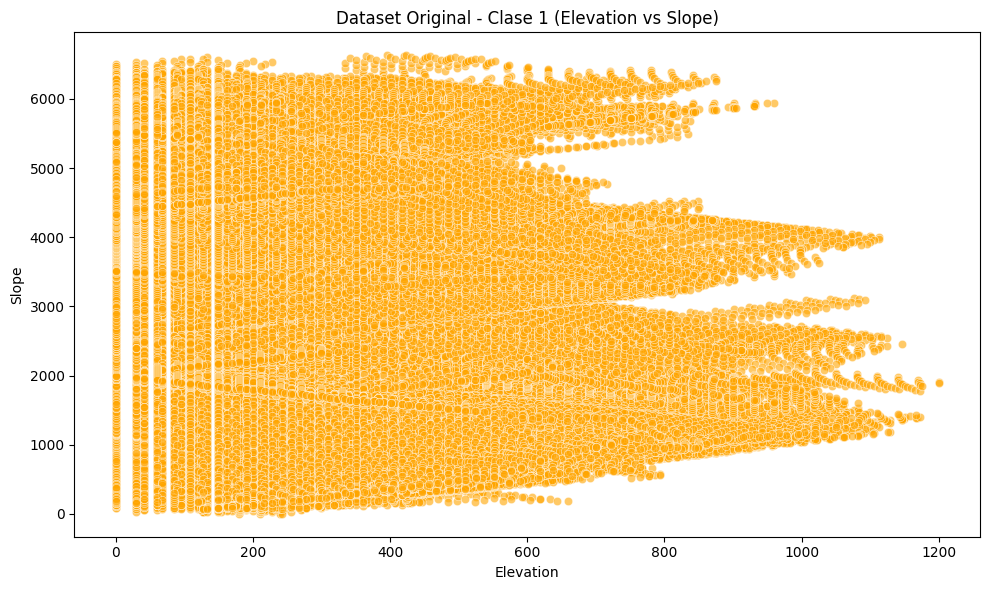

In [8]:
# Crear gráfico para el dataset original, solo clase 1 y usando dos características: Elevation y Slope
plt.figure(figsize=(10, 6)) #(ancho, largo)
sns.scatterplot(data=df_original_clase1, x='Elevation', y='Slope', color='orange', alpha=0.6)
plt.title('Dataset Original - Clase 1 (Elevation vs Slope)')
plt.xlabel('Elevation')
plt.ylabel('Slope')
plt.tight_layout()
plt.show()

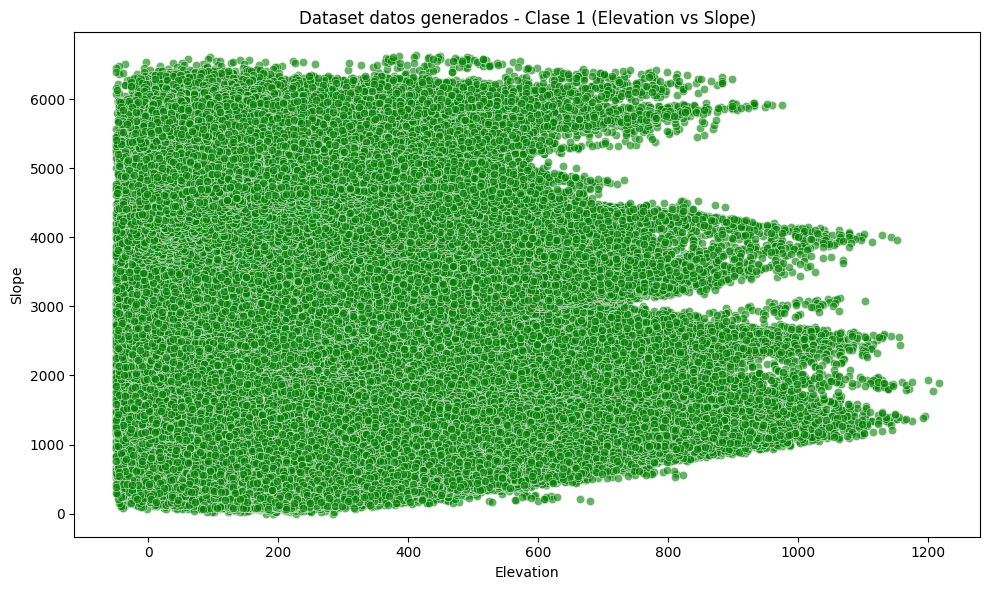

In [11]:
# Crear gráfico para el dataset duplicado, solo clase 1 y usando dos características: Elevation y Slope
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_duplicado_clase1, x='Elevation', y='Slope', color='green', alpha=0.6)
plt.title('Dataset datos generados - Clase 1 (Elevation vs Slope)')
plt.xlabel('Elevation')
plt.ylabel('Slope')
plt.tight_layout()
plt.show()

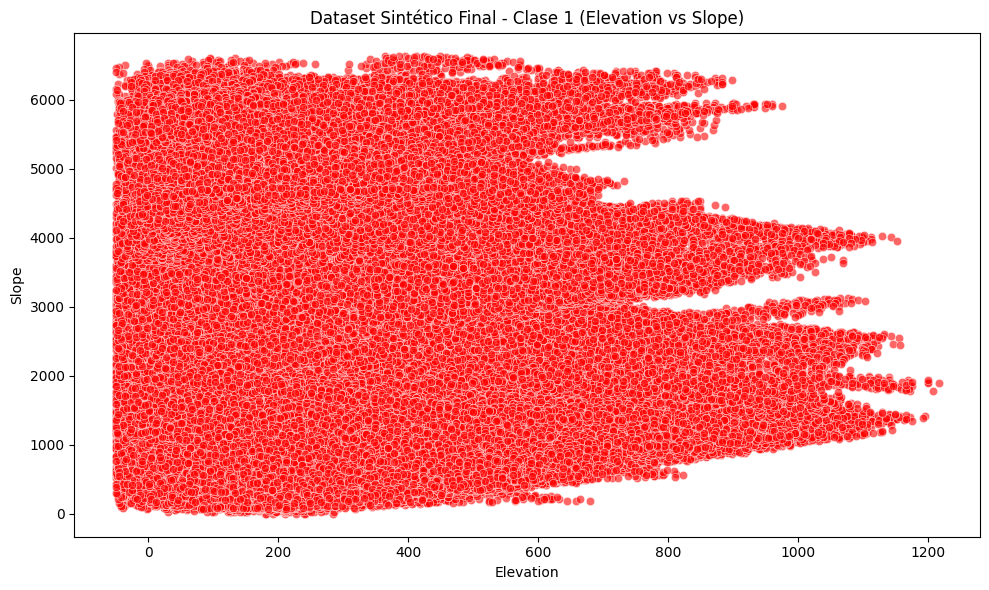

In [12]:
# Crear gráfico para el dataset duplicado, solo clase 1 y usando dos características: Elevation y Slope
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_final_clase1, x='Elevation', y='Slope', color='red', alpha=0.6)
plt.title('Dataset Sintético Final - Clase 1 (Elevation vs Slope)')
plt.xlabel('Elevation')
plt.ylabel('Slope')
plt.tight_layout()
plt.show()

Comparamos los datasets: Original y Final para visualizar mejor si la creación de datos tuvo consistencia con los datos originales.

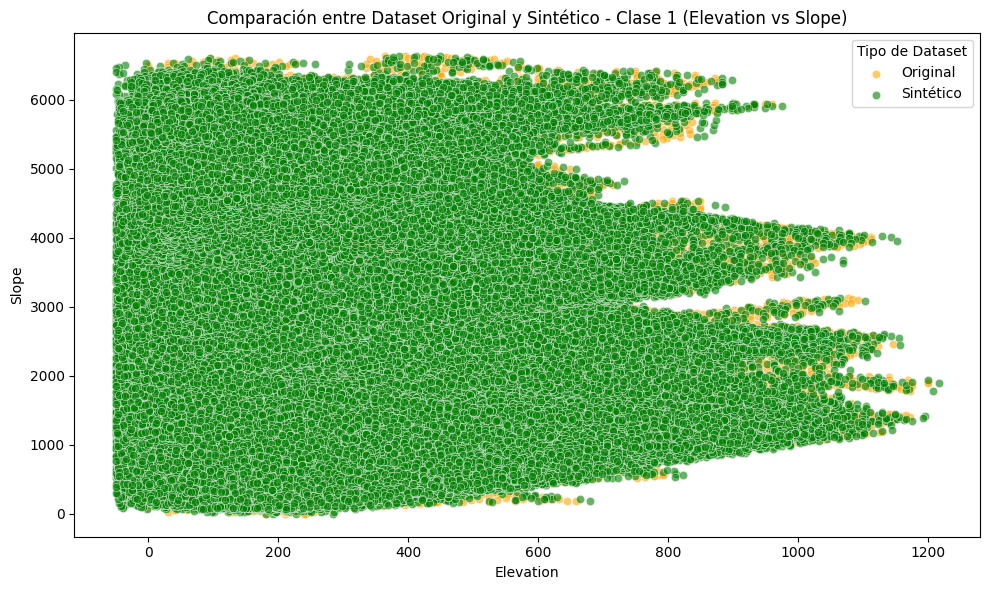

In [13]:
# Crear un gráfico para comparar ambos datasets usando Elevation y Slope
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Graficar los datos del dataset original
sns.scatterplot(data=df_original_clase1, x='Elevation', y='Slope', color='orange', label='Original', alpha=0.6)

# Graficar los datos del dataset duplicado
sns.scatterplot(data=df_duplicado_clase1, x='Elevation', y='Slope', color='green', label='Sintético', alpha=0.6)

# Título y etiquetas
plt.title('Comparación entre Dataset Original y Sintético - Clase 1 (Elevation vs Slope)')
plt.xlabel('Elevation')
plt.ylabel('Slope')

# Ajustar el gráfico y mostrar la leyenda
plt.legend(title='Tipo de Dataset')
plt.tight_layout()
plt.show()

**Histograma o gráfico de densidad**

La densidad en este gráfico te muestra cómo se distribuyen los valores de la característica "Elevation" en ambos datasets (original y sintético). Es una forma de representar la frecuencia relativa de los valores.


1.   **Altas densidades (picos)** indican que hay más ejemplos con esos valores de elevación.
2.   **Bajas densidades (valores bajos en el eje Y)** indican que hay menos ejemplos con esos valores de elevación.


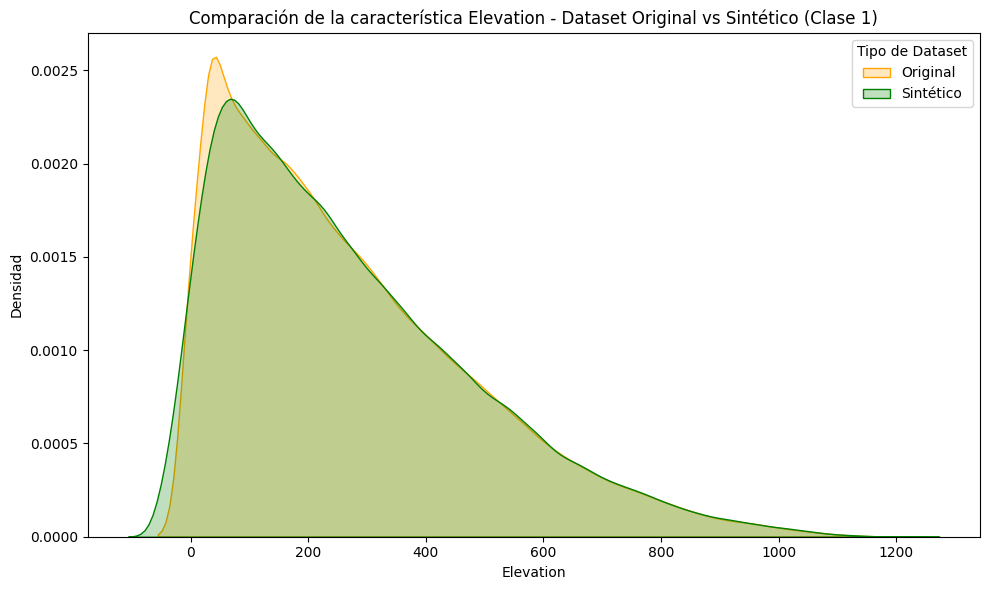

In [14]:
# Crear un gráfico para comparar la distribución de Elevation en ambos datasets
plt.figure(figsize=(10, 6))

# Graficar la distribución de Elevation del dataset original
sns.kdeplot(df_original_clase1['Elevation'], color='orange', label='Original', fill=True)

# Graficar la distribución de Elevation del dataset sintético
sns.kdeplot(df_duplicado_clase1['Elevation'], color='green', label='Sintético', fill=True)

# Título y etiquetas
plt.title('Comparación de la característica Elevation - Dataset Original vs Sintético (Clase 1)')
plt.xlabel('Elevation')
plt.ylabel('Densidad')

# Mostrar la leyenda
plt.legend(title='Tipo de Dataset')
plt.tight_layout()
plt.show()

In [9]:
# Verificar dimensiones finales del dataset
print(f"Dimensiones del dataset original: {df_original.shape}")
print(f"Dimensiones del dataset duplicado: {df_duplicado.shape}")
print(f"Dimensiones del dataset final: {df_final.shape}")

Dimensiones del dataset original: (581012, 58)
Dimensiones del dataset duplicado: (581012, 58)
Dimensiones del dataset final: (1162024, 58)


In [10]:

# print(data)
# Separamos caracteristicas de las clases
X = df_final.drop('Cover_Type', axis=1)
y = df_final['Cover_Type']
print(X.shape)
print(y.shape)

df_final

(1162024, 57)
(1162024,)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Nombre_Area,Tipo_Suelo_Principal,Riesgo_Incendio
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,5,Cache la Poudre,A,True
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,5,Neota,C,True
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,2,Rawah,C,True
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,2,Cache la Poudre,C,False
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,5,Neota,C,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162019,2396,153,20,61,10,107,146,307,160,255,...,0,0,0,0,0,0,3,Neota,D,True
1162020,2391,152,19,109,25,94,249,315,196,255,...,0,0,0,0,0,0,3,Neota,D,True
1162021,2386,159,17,65,352,90,216,204,206,255,...,0,0,0,0,0,0,3,Comanche Peak,D,True
1162022,2384,170,15,68,356,92,317,218,139,255,...,0,0,0,0,0,0,3,Comanche Peak,A,False


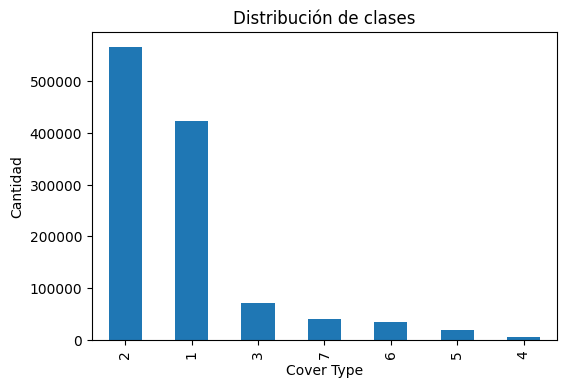

In [11]:
# Visualizamos la distribución de las clases
plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar')
plt.title('Distribución de clases')
plt.xlabel('Cover Type')
plt.ylabel('Cantidad')
plt.show()

Separamos las columnas categóricas para poder convertirlas en variables numéricas con la función OneHotEncoder

Convertimos la columna booleana en 1 y 0.

In [12]:
# Separar las columnas categóricas (Nombre_Area, Tipo_Suelo_Principal) y booleanas (Riesgo_Incendio)
categorical_columns = ['Nombre_Area', 'Tipo_Suelo_Principal']
boolean_columns = ['Riesgo_Incendio']

# Usar OneHotEncoder para convertir las columnas categóricas en variables numéricas
encoder = OneHotEncoder(sparse=False)
X_categorical_encoded = encoder.fit_transform(df_final[categorical_columns])

# Convertir las columnas booleanas en 1 y 0
df_final['Riesgo_Incendio'] = df_final['Riesgo_Incendio'].astype(int)

# Seleccionar las columnas numéricas
numeric_columns = df_final.select_dtypes(include=[np.number]).columns

# Extraer las columnas numéricas
X_numeric = df_final[numeric_columns]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Normalizamos los datos del dataset con la función "StandartScaler" y separamos los datos en 80% de entrenamiento y 20% prueba



*   **Media 0:** Esto significa que se desplazan los datos de tal manera que su "centro" se encuentre en el origen (en 0).

*   **Desviación estándar 1:** La desviación estándar mide qué tan dispersos están los datos en relación con la media. Al establecerla en 1, nos aseguramos de que los datos estén dentro de una escala uniforme.


In [13]:
# La normalización transforma las características para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Separamos los datos de entrenamiento 80% y los datos de prueba 20%
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convertir el array escalado de vuelta a DataFrame
df_scaled_numeric = pd.DataFrame(X_scaled, columns=numeric_columns)

# Unir las columnas categóricas codificadas y las columnas numéricas escaladas
df_final_scaled = pd.concat([df_scaled_numeric, pd.DataFrame(X_categorical_encoded, columns=encoder.get_feature_names_out()), df_final[boolean_columns]], axis=1)

print("Conjunto de datos de entrenamiento:", X_train.shape)
print("Conjunto de datos de prueba:", X_test.shape)
df_final_scaled

Conjunto de datos de entrenamiento: (929619, 56)
Conjunto de datos de prueba: (232405, 56)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Riesgo_Incendio,Nombre_Area_Cache la Poudre,Nombre_Area_Comanche Peak,Nombre_Area_Neota,Nombre_Area_Rawah,Tipo_Suelo_Principal_A,Tipo_Suelo_Principal_B,Tipo_Suelo_Principal_C,Tipo_Suelo_Principal_D,Riesgo_Incendio
0,-1.297805,-0.935157,-1.482820,-0.053577,-0.795219,-1.180147,0.181413,0.190874,0.095565,4.052719,...,0.998995,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,-1.319235,-0.890480,-1.616363,-0.268975,-0.854623,-1.257107,0.160990,0.256798,0.149460,4.010325,...,0.998995,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,-0.554907,-0.148836,-0.681563,-0.006751,-0.151670,0.532211,0.446916,0.322722,-0.137976,3.928677,...,0.998995,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
3,-0.622768,-0.005869,0.520322,-0.128498,0.373070,0.474491,0.528609,0.322722,-0.371518,3.999334,...,-1.001006,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,-1.301377,-0.988770,-1.616363,-0.545247,-0.805119,-1.256466,0.160990,0.234823,0.131495,3.968716,...,-1.001006,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162019,-2.012130,-0.023740,0.787408,-0.976043,-0.696211,-1.438604,-1.350332,1.838966,0.311142,-0.676579,...,0.998995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1162020,-2.029988,-0.032675,0.653865,-0.751280,-0.547700,-1.446941,0.753265,2.014763,0.957873,-0.676579,...,0.998995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1162021,-2.047847,0.029873,0.386780,-0.957313,2.689845,-1.449507,0.079297,-0.424413,1.137521,-0.676579,...,0.998995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1162022,-2.054990,0.128163,0.119694,-0.943265,2.729448,-1.448224,2.142047,-0.116769,-0.066117,-0.676579,...,-1.001006,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [14]:
X_scaled

array([[-1.29780509, -0.93515698, -1.48281978, ..., -0.12365355,
         2.11136619,  0.99899536],
       [-1.31923485, -0.89047967, -1.61636259, ..., -0.12365355,
         2.11136619,  0.99899536],
       [-0.5549068 , -0.14883628, -0.68156292, ..., -0.12365355,
        -0.03685673,  0.99899536],
       ...,
       [-2.04784663,  0.02987297,  0.38677957, ..., -0.12365355,
         0.67921758,  0.99899536],
       [-2.05498988,  0.12816306,  0.11969395, ..., -0.12365355,
         0.67921758, -1.00100565],
       [-2.05856151,  0.08348575, -0.14739167, ..., -0.12365355,
         0.67921758,  0.99899536]])

**Regresión logística por clases**

Asegurarse de que el modelo pueda ajustar mejor las predicciones, ya que añade el término de intercepción (bias), permitiendo al modelo no estar restringido a que su salida esté directamente relacionada con el origen (0,0), lo cual es crucial en la mayoría de los problemas de regresión logística o lineal.

***np.ones((X_train.shape[0], 1)):***
Crea una matriz de unos de tamaño (m, 1), donde m es el número de ejemplos en el conjunto de entrenamiento.

***hstack (horizontal stack)*** toma dos matrices y las concatena horizontalmente.

In [15]:
# Añadir columna de unos para el término de intercepción
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

La función **"calcular Sigmoid"** convierte los valores lineales de la combinación lineal de características a probabilidades en el rango (0, 1).

In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

La función de "calcular costo" calcula el costo regularizado para un conjunto de parámetros theta

la **función de costo (o cost_function)** mide qué tan bien se están ajustando los parámetros θ para predecir correctamente los valores de y. La fórmula es:

**theta** son los parámetros del modelo.En regresión logística, θ es un vector de parámetros que define el modelo. Cada componente de θ está asociado a una característica específica del conjunto de datos.

**lambda_** es el parámetro de regularización que penaliza los valores grandes de theta para evitar el sobreajuste.

In [17]:
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (-1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))
    grad = (1/m) * X.T.dot(h - y)
    return cost, grad

**El gradiente** indica en qué dirección ajustar los parámetros θ para minimizar el costo. En cada paso de optimización, los parámetros se actualizan en la dirección opuesta al gradiente, en un proceso conocido como gradiente descendente.

In [18]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y) #Número de ejemplos
    J_history = []

    for i in range(num_iters):
        cost, grad = cost_function(theta, X, y)
        theta = theta - alpha * grad #se están ajustando los valores de theta restando un pequeño paso (controlado por alpha) en la dirección opuesta al gradiente
        J_history.append(cost) # Se almacena el valor del costo actual en la lista J_history para poder ver cómo evoluciona el costo a lo largo de las iteraciones

    return theta, J_history, cost, grad

In [19]:
# Parámetros para el entrenamiento
num_classes = 7
num_features = X_train.shape[1]
num_iters = 1000
alpha = 0.1 #Es la tasa de aprendizaje, que controla el tamaño de los pasos que da el algoritmo en cada iteración.

In [20]:
# Listas para almacenar los resultados
all_theta = []   # valores de los parámetros theta
all_J_history = []    # valores del costo (J) para cada iteración de entrenamiento. Para gráficar la convergencia de la clase
train_accuracies = []
test_accuracies = []
final_costs = []   # Esta lista almacenará el costo final de cada clasificador (una vez que ha terminado el proceso de entrenamiento)
final_gradients = [] # Aquí se almacenarán los gradientes finales de los parámetros theta para cada clase.

# Entrenamiento de regresión logística para cada clase
plt.figure(figsize=(40, 30))

<Figure size 4000x3000 with 0 Axes>

<Figure size 4000x3000 with 0 Axes>

Entrenando clasificador para la clase 1
costo de la clase 1: 0.093016
Precisión en entrenamiento para clase 1: 99.76%
Precisión en prueba para clase 1: 99.76%
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Convergencia del costo:
Entrenando clasificador para la clase 2
costo de la clase 2: 0.517199
Precisión en entrenamiento para clase 2: 77.73%
Precisión en prueba para clase 2: 77.70%
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Convergencia del costo:
Entrenando clasificador para la 

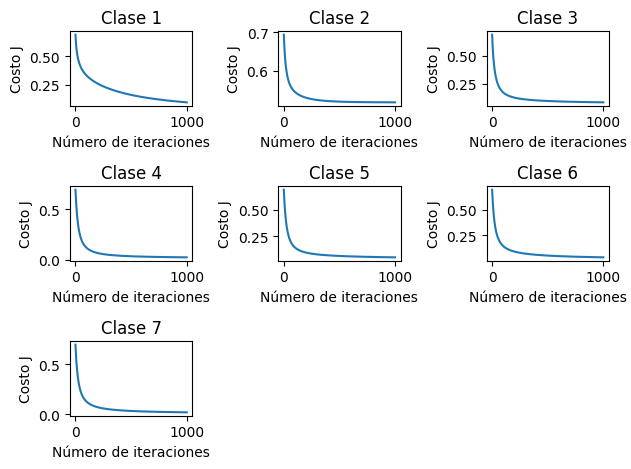


Costos finales por clase:
--------------------------
Clase 1: 0.093016
Clase 2: 0.517199
Clase 3: 0.079199
Clase 4: 0.022329
Clase 5: 0.048099
Clase 6: 0.038128
Clase 7: 0.017180

Gradientes finales por clase:
------------------------------
Clase 1:
[ 9.79036443e-03  3.89128977e-04 -3.55055776e-05  8.16791281e-05
 -5.43909623e-05  1.03132940e-06 -6.64886208e-06 -3.48004232e-05
 -6.21168200e-05 -3.61853369e-05 -1.41678633e-05 -6.21760255e-06
  1.58816486e-06 -1.11206651e-05 -1.39362090e-03 -6.40390326e-04
 -5.86126624e-04 -2.10698890e-04 -3.92620952e-04 -4.67844485e-04
 -1.10475344e-04  3.26189503e-06 -6.86464067e-06 -3.85045087e-05
 -4.05497706e-04 -3.42809302e-04 -3.59066415e-04 -1.69624012e-04
 -3.04487860e-04 -2.22467805e-05  6.65832494e-06 -9.00566069e-05
 -7.28932073e-05  7.09787558e-05  4.00418139e-05  1.62791980e-04
  3.75461476e-04  2.95165226e-04  1.16012754e-04 -1.97827342e-05
 -6.29624711e-05  1.98513879e-05 -1.05963330e-04  1.42669097e-05
 -6.87547681e-05  5.48142838e-05  

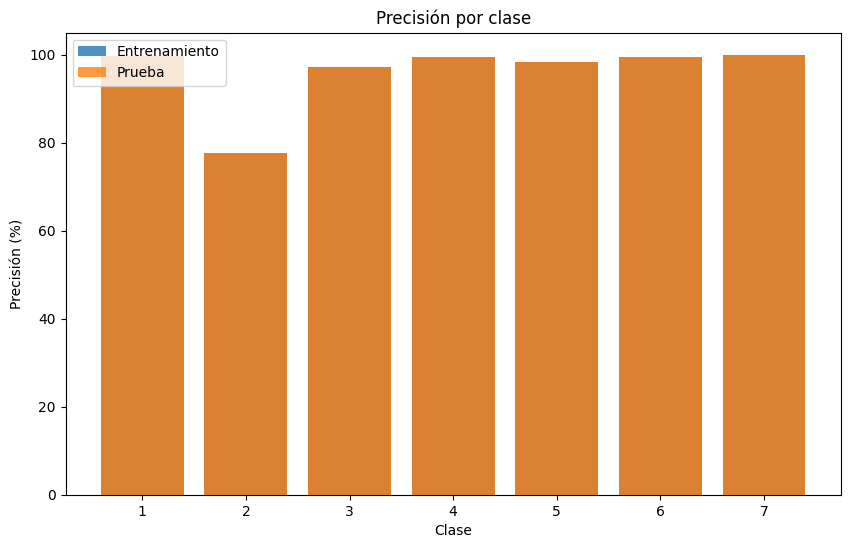

In [37]:
for class_label in range(1, num_classes + 1):
    print(f"Entrenando clasificador para la clase {class_label}")

    # Preparar etiquetas binarias para la clase actual
    y_train_binary = (y_train == class_label).astype(int)
    y_test_binary = (y_test == class_label).astype(int)

    # Inicializar theta
    #Se utiliza la función de NumPy np.zeros() para generar un vector de ceros con la longitud num_features, que es el número de características (o atributos) del conjunto de datos
    initial_theta = np.zeros(num_features)

     # Entrenar el modelo
    theta, J_history, final_cost, final_grad = gradient_descent(X_train, y_train_binary, initial_theta, alpha, num_iters)

    # Almacenar resultados
    all_theta.append(theta)
    all_J_history.append(J_history)
    final_costs.append(final_cost)
    final_gradients.append(final_grad)

    # Calcular precisión en entrenamiento y prueba
    #Se calcula la predicción lineal multiplicando la matriz de características de entrenamiento (X_train) y prueba (X_test) por el vector de parámetros theta.
    #Esto da como resultado una predicción lineal que luego se pasa por la función sigmoide.

    #Si la probabilidad es mayor o igual a 0.5, se asigna una etiqueta de 1 (clase positiva). Si es menor, se asigna una etiqueta de 0 (clase negativa).

    #Convierte el resultado de la comparación (que es un booleano) en un número entero (0 o 1).
    #Esto es necesario para que las predicciones sean del mismo tipo que las etiquetas reales (y_train_binary y y_test_binary).

    y_pred_train = (sigmoid(X_train.dot(theta)) >= 0.5).astype(int) #
    y_pred_test = (sigmoid(X_test.dot(theta)) >= 0.5).astype(int)


    # np.mean Calcula el promedio de este arreglo booleano, donde True se considera 1 y False se considera 0.
    #El promedio resultante es la precisión del modelo, es decir, el porcentaje de predicciones correctas.

    # Compara las predicciones del modelo (y_pred_train y y_pred_test) con las etiquetas reales (y_train_binary y y_test_binary).
    # El resultado es un arreglo booleano, donde True indica que la predicción es correcta y False indica que es incorrecta.

    train_accuracy = np.mean(y_pred_train == y_train_binary) * 100
    test_accuracy = np.mean(y_pred_test == y_test_binary) * 100

    #Almacena resultados
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


    print(f"costo de la clase {class_label}: {final_cost:.6f}")
    print(f"Precisión en entrenamiento para clase {class_label}: {train_accuracy:.2f}%")
    print(f"Precisión en prueba para clase {class_label}: {test_accuracy:.2f}%")
    print("---"*100)

    # Graficar convergencia del costo
    plt.subplot(3, 3, class_label)
    plt.plot(range(num_iters), J_history)
    print('Convergencia del costo:')
    plt.title(f'Clase {class_label}')
    plt.xlabel('Número de iteraciones')
    plt.ylabel('Costo J')

plt.tight_layout()
plt.show()

# Imprimir costos finales para todas las clases
print("\nCostos finales por clase:")
print("--------------------------")
for class_label, cost in enumerate(final_costs, 1):
    print(f"Clase {class_label}: {cost:.6f}")

# Imprimir gradientes finales (opcional, puede ser muy largo)
print("\nGradientes finales por clase:")
print("------------------------------")
for class_label, grad in enumerate(final_gradients, 1):
    print(f"Clase {class_label}:")
    print(grad)
    print()

# Visualizar precisiones
plt.figure(figsize=(10, 6))
plt.bar(range(1, num_classes + 1), train_accuracies, alpha=0.8, label='Entrenamiento')
plt.bar(range(1, num_classes + 1), test_accuracies, alpha=0.8, label='Prueba')
plt.xlabel('Clase')
plt.ylabel('Precisión (%)')
plt.title('Precisión por clase')
plt.legend()
plt.xticks(range(1, num_classes + 1))
plt.show()


In [30]:
# Función de predicción One-vs-All
def predict_one_vs_all(X, all_theta):
    h = sigmoid(X.dot(np.array(all_theta).T))
    return np.argmax(h, axis=1) + 1

In [31]:
# Realizar predicciones
y_pred_train = predict_one_vs_all(X_train, all_theta)
y_pred_test = predict_one_vs_all(X_test, all_theta)

# Calcular precisión general
train_accuracy = np.mean(y_pred_train == y_train) * 100
test_accuracy = np.mean(y_pred_test == y_test) * 100

print(f"Precisión general en entrenamiento: {train_accuracy:.2f}%")
print(f"Precisión general en prueba: {test_accuracy:.2f}%")

Precisión general en entrenamiento: 91.83%
Precisión general en prueba: 91.82%


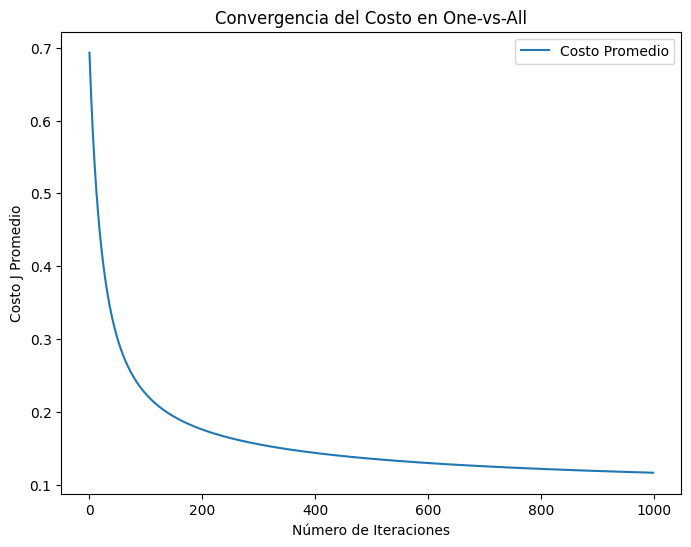

In [33]:
# Crear un vector de costo promedio a lo largo de todas las clases
average_J_history = np.mean(all_J_history, axis=0)

# Graficar la convergencia del costo promedio
plt.figure(figsize=(8, 6))
plt.plot(range(num_iters), average_J_history, label="Costo Promedio")
plt.title('Convergencia del Costo en One-vs-All')
plt.xlabel('Número de Iteraciones')
plt.ylabel('Costo J Promedio')
plt.legend()
#plt.grid(True)
plt.show()

**Regresión One vs All**

In [21]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

es común utilizar regularización para evitar el sobreajuste, lo que añade un término a la función de costo y ajusta la fórmula del gradiente.

In [22]:
def cost_function(theta, X, y, lambda_):
    m = len(y)
    h = sigmoid(X.dot(theta))
    # cost = (-1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))
    J = (-1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h)) + (lambda_ / (2*m)) * np.sum(theta[1:]**2)
    # grad = (1/m) * X.T.dot(h - y)
    grad = (1/m) * X.T.dot(h - y)
    #lambda es el parámetro de regularización para prevenir el sobreajuste
    grad[1:] += (lambda_ / m) * theta[1:]
    return J, grad

In [23]:
def gradient_descent(X, y, theta, alpha, num_iters, lambda_):
    m = len(y)
    J_history = []

    for _ in range(num_iters):
        cost, grad = cost_function(theta, X, y, lambda_)
        theta -= alpha * grad
        J_history.append(cost)

    return theta, J_history

In [24]:
def one_vs_all(X, y, num_labels, lambda_, alpha, num_iters):
    n = X.shape[1]
    all_theta = np.zeros((num_labels, n + 1))
    all_J_history = []

    X = np.hstack([np.ones((X.shape[0], 1)), X])

    for i in range(1, num_labels + 1):
        initial_theta = np.zeros(n + 1)
        #Convierte las etiquetas y en un vector binario, donde 1 representa la clase actual y 0 representa las otras clases. Esto convierte el problema en un problema binario para la clase i.
        y_i = (y == i).astype(int)
        #Llama a la función de descenso por gradiente para optimizar los parámetros θ para la clase i. Esta función devuelve los valores optimizados de θ y el historial de costos J istory durante las iteraciones.
        theta, J_history = gradient_descent(X, y_i, initial_theta, alpha, num_iters, lambda_)
        #Almacena los valores de θ entrenados para la clase i.
        all_theta[i-1] = theta
        all_J_history.append(J_history)

    return all_theta, all_J_history

In [25]:
def predict_one_vs_all(X, all_theta):
    X = np.hstack([np.ones((X.shape[0], 1)), X])

    #Calcula las probabilidades para cada clase aplicando la función sigmoide sobre el producto matricial de X y los parámetros θ.
    #La salida es una matriz donde cada fila contiene las probabilidades de las distintas clases para un ejemplo dado.
    h = sigmoid(X.dot(all_theta.T))

    #Encuentra el índice de la clase con la probabilidad más alta (porque argmax devuelve índices empezando en 0, se suma 1 para obtener las etiquetas de clase correctas que empiezan desde 1).
    return np.argmax(h, axis=1) + 1

In [26]:
# Parámetros
num_labels = 7
lambda_ = 0.1
alpha = 0.1
num_iters = 1000

In [27]:
# Entrenamiento
all_theta, all_J_history = one_vs_all(X_train, y_train, num_labels, lambda_, alpha, num_iters)

# Predicciones
y_pred_train = predict_one_vs_all(X_train, all_theta)
y_pred_test = predict_one_vs_all(X_test, all_theta)

# Calcular precisión
train_accuracy = np.mean(y_pred_train == y_train) * 100
test_accuracy = np.mean(y_pred_test == y_test) * 100

print(f"Precisión en entrenamiento: {train_accuracy:.2f}%")
print(f"Precisión en prueba: {test_accuracy:.2f}%")

Precisión en entrenamiento: 92.03%
Precisión en prueba: 92.03%


De todas las observaciones en el conjunto de entrenamiento, el modelo clasificó correctamente el tipo de cobertura forestal en el 92.03% de los casos.

El modelo fue capaz de generalizar bien en datos que no ha visto, clasificando correctamente el tipo de cobertura forestal en el 92.03% de los casos.

In [28]:
print(all_theta)

[[-1.22775765e+00 -1.22774845e+00  1.11748242e+00 -5.15455794e-02
   4.13442867e-02 -2.43353521e-01  1.48310449e-02 -3.58636913e-02
  -3.97975025e-02 -5.27851262e-02 -5.34538936e-03  5.16158098e-03
   5.34159230e-04 -4.47290565e-03  9.49489446e-04  4.83274382e-02
   2.95494293e-02 -4.41514109e-02 -6.05785221e-02 -7.86700045e-02
   2.30515941e-02 -1.49763933e-02 -3.25618371e-02 -1.89865531e-04
   3.19065340e-02 -1.95816514e-02 -2.51440996e-02 -9.04840227e-02
  -1.02258350e-01  1.65608701e-02  1.89864310e-03  9.65807157e-03
   2.00767225e-02 -3.66652711e-02  2.04240488e-02  4.66666014e-02
   9.83311975e-02  1.08052413e-01  7.83782944e-02  2.17473165e-02
  -3.58453246e-02 -4.34505568e-02 -2.49967918e-03 -2.42043024e-02
  -6.48177481e-02 -6.42496597e-02  4.84765408e-03 -9.00586230e-02
  -2.73246846e-02 -8.37336295e-02  1.13761912e-01 -1.86423824e-02
   5.88352817e-03  1.35478455e-01  2.54422695e-01  1.21557781e-01
  -5.40630481e+00  7.25172755e-05]
 [-9.63263698e-02 -9.63255707e-02 -1.2184

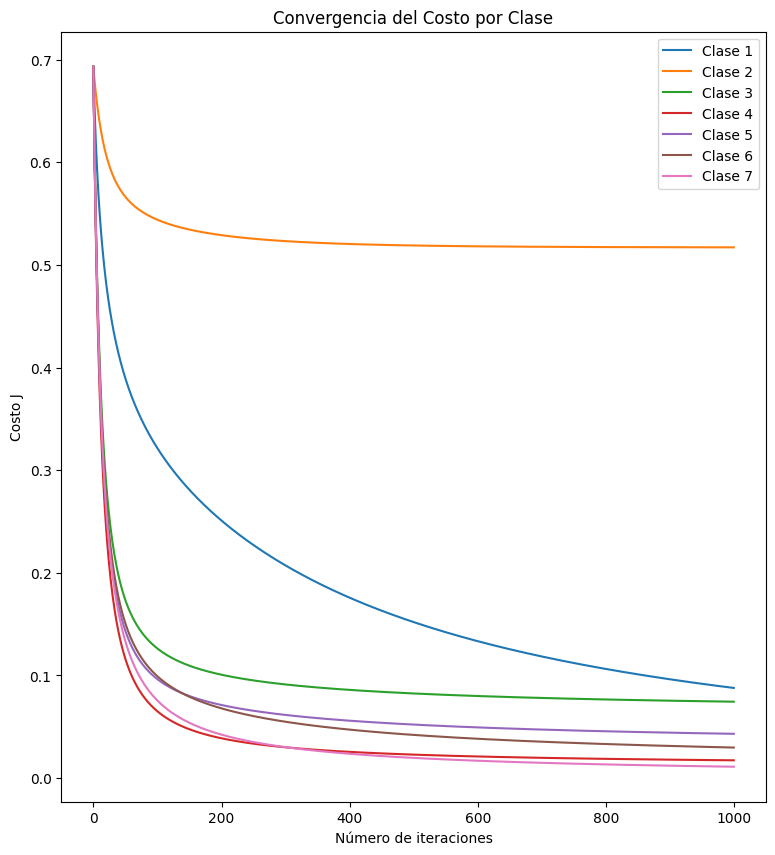

In [34]:
# Graficar convergencia del costo para cada clase y convergencia general
plt.figure(figsize=(20, 10))

# Gráfica para cada clase
plt.subplot(1, 2, 1)
for i in range(num_labels):
    plt.plot(range(num_iters), all_J_history[i], label=f'Clase {i+1}')

plt.title('Convergencia del Costo por Clase')
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.legend()

Clase 2 destaca por tener un costo más alto y una convergencia más lenta. Esto puede indicar que el modelo tiene más dificultades para clasificar correctamente los ejemplos de esa clase.

Las demás clases (1, 3, 4, 5, 6, 7) convergen rápidamente a un costo bajo, lo que sugiere que el modelo puede clasificarlas correctamente con menos ajustes.

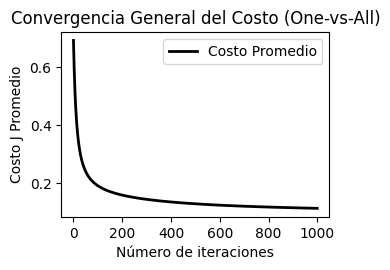

In [38]:
# Gráfica de convergencia general
plt.subplot(2, 2, 1)
avg_J_history = np.mean(all_J_history, axis=0)
plt.plot(range(num_iters), avg_J_history, label='Costo Promedio', color='black', linewidth=2)

plt.title('Convergencia General del Costo (One-vs-All)')
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J Promedio')
plt.legend()

plt.tight_layout()
plt.show()